In [1]:
from pyincore import IncoreClient
from pyincore.analyses.buildingdamage import BuildingDamage

In [2]:
client = IncoreClient()

In [4]:
# New madrid earthquake using Atkinson Boore 1995
hazard_type = "earthquake"
hazard_id = "5b902cb273c3371e1236b36b"

# Building damage ratios
dmg_ratio_id = "5a284f2ec7d30d13bc08209a"

In [5]:
# Building dataset
bldg_dataset_id = "5a284f0bc7d30d13bc081a28"

In [6]:
# Earthquake mapping
mapping_id = "5b47b350337d4a3629076f2c"

In [7]:
# Run Memphis earthquake building damage
bldg_dmg = BuildingDamage(client)
bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)
bldg_dmg.load_remote_input_dataset("dmg_ratios", dmg_ratio_id)

result_name = "memphis_bldg_dmg_result"
bldg_dmg.set_parameter("result_name", result_name)
bldg_dmg.set_parameter("mapping_id", mapping_id)
bldg_dmg.set_parameter("hazard_type", hazard_type)
bldg_dmg.set_parameter("hazard_id", hazard_id)
bldg_dmg.set_parameter("num_cpu", 10)

# Run Analysis
bldg_dmg.run_analysis()

Dataset already exists locally. Reading from local cache.
Dataset already exists locally. Reading from local cache.


True

In [10]:
# Display output by using Pandas DataFrame
df = bldg_dmg.get_output_dataset("result").get_dataframe_from_csv()
df.sort_values('meandamage', ascending=False).head(10)

,guid,immocc,lifesfty,collprev,insignific,moderate,heavy,complete,meandamage,mdamagedev,hazardtype,hazardval
6,96eca79e-7d0f-48a6-bffd-5bfc1e094363,0.923827,0.491030,0.070218,0.076173,0.432797,0.420812,0.070218,0.362107,0.263111,PGA,0.315782
2,4253802e-b3e5-4ed3-93b0-dda9ef6362b0,0.896775,0.480926,0.087568,0.103225,0.415849,0.393358,0.087568,0.360131,0.275124,PGA,0.308425
14,1eab704b-bb56-425f-a3ad-a7b5f937554e,0.856179,0.446934,0.094467,0.143821,0.409245,0.352467,0.094467,0.343029,0.283477,Sa,0.495900
11,1d33e811-56c4-4a56-a540-d8d90d82b5f5,0.880045,0.445909,0.074361,0.119955,0.434136,0.371548,0.074361,0.339167,0.270776,PGA,0.291682
21,152bc26f-839b-48db-8943-adf04efca945,0.891626,0.413496,0.047436,0.108374,0.478130,0.366060,0.047436,0.318677,0.253843,PGA,0.287643
9,433680c6-6269-4632-8c44-738d94d8b30c,0.879303,0.388868,0.041463,0.120697,0.490435,0.347405,0.041463,0.305010,0.250240,PGA,0.279051
5,75fa116e-6409-434e-b326-67079b0f3c74,0.858405,0.343597,0.030156,0.141595,0.514808,0.313442,0.030156,0.280036,0.241058,PGA,0.315782
8,5a96f279-d125-4b15-a304-adbb65e454a7,0.853632,0.342760,0.031300,0.146368,0.510872,0.311460,0.031300,0.279390,0.242223,PGA,0.315782
3,b185d5b6-5bc0-43a3-800a-c046017372ab,0.810564,0.331283,0.048957,0.189436,0.479281,0.282327,0.048957,0.274576,0.256321,PGA,0.299533
1,254d1dd8-5d2f-4737-909b-59cc64ca72d4,0.844340,0.328296,0.028605,0.155660,0.516045,0.299691,0.028605,0.271340,0.239546,PGA,0.309996


Text(0, 0.5, 'counts')

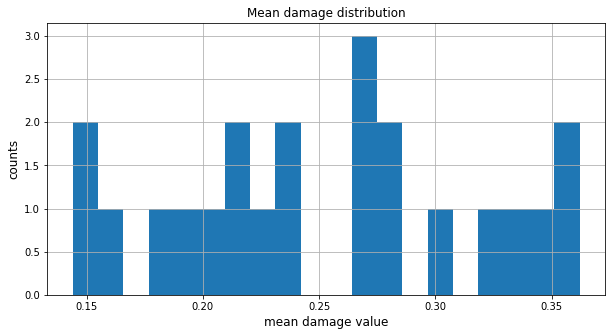

In [12]:
ax = df['meandamage'].hist(bins=20, figsize=[10,5])
ax.set_title("Mean damage distribution", fontsize=12)
ax.set_xlabel("mean damage value", fontsize=12)
ax.set_ylabel("counts", fontsize=12)